# Univariate Linear Regression

This notebook demonstrates the **end-to-end workflow** for training and
evaluating a **univariate linear regression model** using real housing data.

The focus of this session is on:
- understanding the linear regression formulation,
- implementing the model from scratch,
- comparing results with a scikit-learn implementation.

Project modularization and MLOps-oriented architecture
will be emphasized in later sessions.



## Planned Workflow

1. Load housing dataset from CSV
2. Select a single feature and target variable
3. Perform basic preprocessing (scaling and train/test split)
4. Implement univariate linear regression from scratch
5. Train and evaluate a scikit-learn linear regression model
6. Compare model performance and visualize results


## 1. Problem Definition

aim to build a **univariate linear regression model**
to predict **median house value** based on **median income**.

- Feature (X): Median Income (`MedInc`)
- Target (y): Median House Value (`MedHouseVal`)



## 2. Data Loading & Feature Selection

In this step, load the housing dataset from a CSV file and
select a **single input feature** and **target variable**
to prepare for univariate linear regression.

- Input feature (X): Median Income (`MedInc`)
- Target variable (y): Median House Value (`MedHouseVal`)

At this stage, focus on data access and variable selection.


In [1]:
import pandas as pd

# Load dataset from CSV
df = pd.read_csv("../data/raw/california_housing.csv")

# Select univariate feature and target
X = df[["MedInc"]]
y = df["MedHouseVal"]

X.head(), y.head()


(   MedInc
 0  8.3252
 1  8.3014
 2  7.2574
 3  5.6431
 4  3.8462,
 0    4.526
 1    3.585
 2    3.521
 3    3.413
 4    3.422
 Name: MedHouseVal, dtype: float64)

## 3. Train/Test Split & Feature Scaling

This step prepare the dataset for model training by:

- Splitting the data into training and test sets
- Standardizing the input feature to improve optimization stability

Although the California Housing dataset is clean, these steps
reflect standard machine learning preprocessing practice.


In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing subsets
# X contains the input feature (Median Income)
# y contains the target variable (Median House Value)
#
# test_size=0.2 means:
#   - 80% of the data will be used for training
#   - 20% of the data will be reserved for testing
#
# random_state is set for reproducibility, so that
# the same split can be obtained every time the notebook is run
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Display the shape of each split to verify the operation
# This helps confirm that the split was performed correctly
X_train.shape, X_test.shape


((16512, 1), (4128, 1))

In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
# Standardization rescales the feature so that:
#   - mean = 0
#   - standard deviation = 1
#
# This improves numerical stability and helps
# gradient-based optimization converge faster
scaler = StandardScaler()

# Fit the scaler ONLY on the training data
# This computes the mean and standard deviation
# from the training set
X_train_scaled = scaler.fit_transform(X_train)

# Apply the SAME transformation to the test data
# We do NOT refit on the test data to avoid data leakage
X_test_scaled = scaler.transform(X_test)

# Display the first few scaled values to inspect the result
X_train_scaled[:5]


array([[-0.326196  ],
       [-0.03584338],
       [ 0.14470145],
       [-1.01786438],
       [-0.17148831]])

## Step 4 — Linear Regression from Scratch

Implement a univariate linear regression model **from scratch**
using basic Python and NumPy.

- how the linear model is defined,
- how predictions are computed,
- how parameters are updated using gradient descent.


In [4]:
import numpy as np


## Step 4.1 — Hypothesis Function Definition

In univariate linear regression, we model the relationship between
the input feature and the target using a linear function:

hθ(x) = θ₀ + θ₁x

Where:
- θ₀ is the intercept (bias)
- θ₁ is the slope (weight)
- x is the input feature (standardized median income)


In [5]:
# Define the linear regression hypothesis function
def predict(X, theta_0, theta_1):
    """
    Compute predictions for input feature X.

    Parameters:
    - X: input feature (scaled median income)
    - theta_0: intercept
    - theta_1: slope

    Returns:
    - y_pred: predicted target values
    """
    return theta_0 + theta_1 * X


## Step 4.2 — Cost Function (Mean Squared Error)

To evaluate how well the model fits the data, we use the
Mean Squared Error (MSE) cost function:

MSE = (1 / n) * Σ (ŷ - y)²

This function penalizes large prediction errors and is
commonly used in linear regression.


In [6]:
# Cost Function (Mean Squared Error)
def mean_squared_error(y_true, y_pred):
    """
    Compute Mean Squared Error loss.

    Parameters:
    - y_true: actual target values
    - y_pred: predicted values

    Returns:
    - mse: mean squared error
    """
    return np.mean((y_true - y_pred) ** 2)


## Step 4.3 — Gradient Descent Algorithm

Gradient descent is an iterative optimization algorithm used to
minimize the cost function by updating model parameters.

At each iteration:
- Compute predictions
- Calculate gradients with respect to θ₀ and θ₁
- Update parameters using the learning rate

This process continues until the model converges.


In [7]:
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    """
    Perform gradient descent to learn theta_0 and theta_1.

    Parameters:
    - X: training feature values
    - y: training target values
    - learning_rate: step size for parameter updates
    - n_iterations: number of iterations

    Returns:
    - theta_0, theta_1: learned model parameters
    """

    # Initialize parameters
    theta_0 = 0.0
    theta_1 = 0.0

    n = len(X)

    for i in range(n_iterations):
        # Compute predictions
        y_pred = predict(X, theta_0, theta_1)

        # Compute gradients
        d_theta_0 = (2 / n) * np.sum(y_pred - y)
        d_theta_1 = (2 / n) * np.sum((y_pred - y) * X)

        # Update parameters
        theta_0 -= learning_rate * d_theta_0
        theta_1 -= learning_rate * d_theta_1

        # Optional: monitor loss
        if i % 100 == 0:
            loss = mean_squared_error(y, y_pred)
            print(f"Iteration {i}: MSE = {loss:.4f}")

    return theta_0, theta_1


## Step 4.4 — Model Training

We now train the linear regression model using gradient descent.

The algorithm iteratively updates θ₀ and θ₁ to minimize
the Mean Squared Error on the training data.


In [8]:
# Train the model using gradient descent
theta_0, theta_1 = gradient_descent(
    X_train_scaled.flatten(),
    y_train.values,
    learning_rate=0.01,
    n_iterations=1000
)

theta_0, theta_1


Iteration 0: MSE = 5.6297
Iteration 100: MSE = 0.7859
Iteration 200: MSE = 0.7007
Iteration 300: MSE = 0.6992
Iteration 400: MSE = 0.6991
Iteration 500: MSE = 0.6991
Iteration 600: MSE = 0.6991
Iteration 700: MSE = 0.6991
Iteration 800: MSE = 0.6991
Iteration 900: MSE = 0.6991


(np.float64(2.071946933891858), np.float64(0.7985195630821527))

## Step 5 - Linear Regression with scikit-learn (Comparison)

Train a univariate linear regression model using
`scikit-learn` and compare its learned parameters with the
from-scratch implementation.


In [9]:
from sklearn.linear_model import LinearRegression


In [10]:
# Initialize the Linear Regression model
sk_model = LinearRegression()


In [11]:
# Train the model on the scaled training data
sk_model.fit(X_train_scaled, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [12]:
# Extract learned parameters
theta_1_sk = sk_model.coef_[0]
theta_0_sk = sk_model.intercept_

theta_0_sk, theta_1_sk


(np.float64(2.071946937378876), np.float64(0.7985195644260356))

## Step 6 - Evaluation (Metrics on Test Set)

Evaluate both models on the **test set** using:
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- R² (Coefficient of Determination)

Evaluating on the test set helps estimate how well the model generalizes to unseen data.


In [13]:
# Step 6.2 - Import evaluation metrics
# We will use scikit-learn's standard metrics to evaluate prediction quality.

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


###  Evaluation Metrics

Use standard regression metrics from `scikit-learn` to evaluate model performance on the test set:

- **mean_squared_error (MSE)**  
  Computes the average of the squared differences between the predicted and actual values.  
  Squaring penalizes larger errors more heavily.

- **Root Mean Squared Error (RMSE)**  
  Obtained by taking the square root of MSE using `np.sqrt(...)`.  
  RMSE is in the same unit as the target variable, making it easier to interpret.

- **mean_absolute_error (MAE)**  
  Computes the average absolute difference between predictions and true values.  
  MAE is less sensitive to outliers than MSE/RMSE.

- **r2_score (R²)**  
  Measures the proportion of variance in the target variable explained by the model.  
  An R² value closer to 1 indicates a better fit.


In [14]:
# Step 6.3 - Predict with the from-scratch model
# Our hypothesis function is:
#   h(x) = theta_0 + theta_1 * x
# Note: X_test_scaled is (n,1). We flatten it to (n,) for simple vector operations.

X_test_1d = X_test_scaled.flatten()
y_pred_scratch = theta_0 + theta_1 * X_test_1d

# Quick sanity check: show first 5 predictions
y_pred_scratch[:5]


array([1.14958917, 1.50606882, 1.90393718, 2.85059383, 2.00663318])

In [15]:
# Step 6.4 - Predict with the scikit-learn model
# scikit-learn expects 2D input for features, so we use X_test_scaled directly.

y_pred_sklearn = sk_model.predict(X_test_scaled)

# Quick sanity check: show first 5 predictions
y_pred_sklearn[:5]


array([1.14958917, 1.50606882, 1.90393718, 2.85059383, 2.00663318])

In [16]:
# Step 6.5 - Compute evaluation metrics on the test set
# Compute RMSE, MAE, and R² for BOTH models so they can be compared fairly.

# From scratch metrics
rmse_scratch = np.sqrt(mean_squared_error(y_test, y_pred_scratch))
mae_scratch  = mean_absolute_error(y_test, y_pred_scratch)
r2_scratch   = r2_score(y_test, y_pred_scratch)

# scikit-learn metrics 
rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_sklearn))
mae_sklearn  = mean_absolute_error(y_test, y_pred_sklearn)
r2_sklearn   = r2_score(y_test, y_pred_sklearn)

rmse_scratch, mae_scratch, r2_scratch, rmse_sklearn, mae_sklearn, r2_sklearn


(np.float64(0.8420901241376189),
 0.6299086523840834,
 0.4588591890433845,
 np.float64(0.8420901241414454),
 0.629908653009376,
 0.45885918903846656)

In [17]:
# Step 6.6 - Display results clearly 

print("=== Evaluation Metrics (Test Set) ===\n")

print("From Scratch Linear Regression:")
print(f"  RMSE = {rmse_scratch:.4f}")
print(f"  MAE  = {mae_scratch:.4f}")
print(f"  R²   = {r2_scratch:.4f}\n")

print("scikit-learn Linear Regression:")
print(f"  RMSE = {rmse_sklearn:.4f}")
print(f"  MAE  = {mae_sklearn:.4f}")
print(f"  R²   = {r2_sklearn:.4f}")


=== Evaluation Metrics (Test Set) ===

From Scratch Linear Regression:
  RMSE = 0.8421
  MAE  = 0.6299
  R²   = 0.4589

scikit-learn Linear Regression:
  RMSE = 0.8421
  MAE  = 0.6299
  R²   = 0.4589


## Step 7 – Regression Line Visualization (Test Set)

This plot visualizes the linear regression model by overlaying the learned
regression line on top of the actual test data points.

The regression line represents the model's prediction, while the scatter
points represent the true observed values. This visualization helps assess
how well the linear model fits the data.


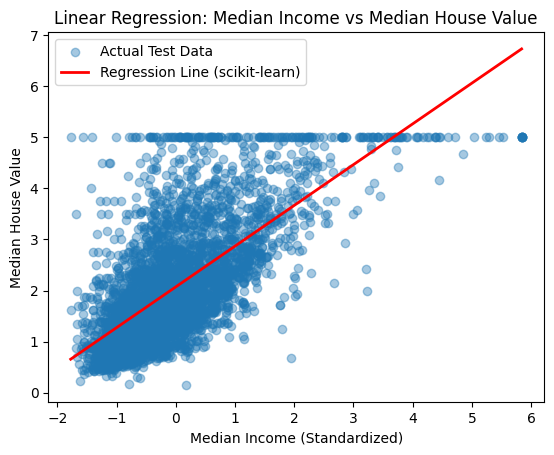

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the test data by X value so the regression line is drawn correctly
# This ensures the line is not zig-zagged when plotted
sorted_idx = np.argsort(X_test_scaled.flatten())

X_test_sorted = X_test_scaled.flatten()[sorted_idx]
y_test_sorted = y_test.values[sorted_idx]

# Predict using the scikit-learn model
y_pred_sorted = sk_model.predict(X_test_scaled)[sorted_idx]

# Create the scatter plot of actual test data
plt.scatter(
    X_test_scaled,
    y_test,
    alpha=0.4,
    label="Actual Test Data")

# Plot the regression line
plt.plot(
    X_test_sorted,
    y_pred_sorted,
    color="red",
    linewidth=2,
    label="Regression Line (scikit-learn)")

# Add labels and title
plt.title("Linear Regression: Median Income vs Median House Value")
plt.xlabel("Median Income (Standardized)")
plt.ylabel("Median House Value")

plt.legend()
plt.show()


The regression line captures the overall positive relationship between
median income and median house value. However, the scatter plot shows
significant variance and a visible ceiling effect around 5.0, indicating
that the linear model cannot fully explain the data.

This visualization is consistent with the moderate R² score and highlights
the limitations of a simple univariate linear regression model.
